We use Deep network to make the boundary for blobs class. We further use mlxtend library to generate the boundaries for different blobs.

In [ ]:
import tensorflow as tf
import numpy as np

import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split
from matplotlib import cm

In [ ]:
def Blobs(centers,Stan_dev,dataNum): 
    num_of_cent = len(centers)
    
    total_point = num_of_cent*dataNum
    data = np.zeros((total_point,2))  
    label = np.zeros(total_point)     
    for count,center in enumerate(centers):
        ix = range(dataNum*count, dataNum*(count + 1))
        mean = center
        cov = [[1*Stan_dev, 0], [0, 1*Stan_dev]]
        data[ix,0], data[ix,1] = np.random.multivariate_normal(mean, cov, dataNum).T
        label[ix] = count
    return data,label.astype('int32')

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28]


Text(0.5, 1.0, 'Data')

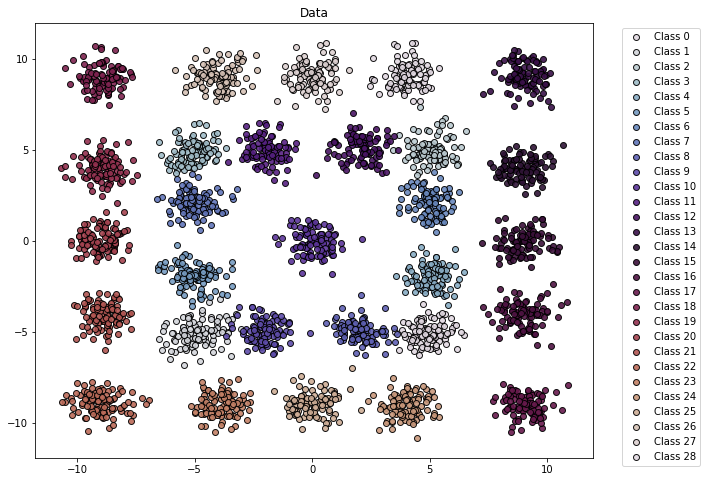

In [ ]:
plt.figure(figsize=(10, 8))

centers = [(5, -5),(-5, -5),(5, 5),(-5, 5),(5, -2),(-5, -2),(5, 2),(-5, 2),(2, -5),(-2, -5), (0, 0), (-2, 5),(2, 5)]
centers1 = [(9,9), (9,4),(9,0),(9,-4),(9,-9)]
centers2 = [(-9,9), (-9,4),(-9,0),(-9,-4),(-9,-9)]
centers3 = [(-4,-9),(4,-9),(0,-9)]
centers4 = [(-4,9),(0,9),(4,9)]

dataNum  = 100
X, y =  Blobs(centers+centers1+centers2+centers3+centers4, 0.4, dataNum)
y_unique = np.unique(y)
print(y_unique)
colors = cm.twilight(np.linspace(0.0, 1.0, y_unique.size))
for this_y, color in zip(y_unique, colors):
    this_X = X[y == this_y]
    plt.scatter(this_X[:, 0], this_X[:, 1],
                c=color[np.newaxis, :],
                alpha=0.9, edgecolor='k',
                label="Class %s" % this_y)
plt.legend(loc="upper right",bbox_to_anchor=(1.2, 1))
plt.title("Data")


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=40)
Y_out=len(np.unique(y))
print(X_train.shape, y_train.shape); print(X_test.shape,Y_out)
# Set the input shape
feature_vector_shape = len(X[0])
input_shape = (feature_vector_shape,)
print(f'Feature shape: {input_shape}')

(2610, 2) (2610,)
(290, 2) 29
Feature shape: (2,)


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=input_shape),
    tf.keras.layers.Dense(128, activation='tanh'),
    tf.keras.layers.Dense(128, activation='tanh'),
#    keras.layers.Dense(128, activation='tanh'),
#    keras.layers.Dense(320, activation='sigmoid'),
    tf.keras.layers.Dense(Y_out)
])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 2)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               384       
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 29)                3741      
Total params: 20,637
Trainable params: 20,637
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optim = tf.keras.optimizers.Adam(learning_rate=0.001)
metrics = ["accuracy"]
model.compile(loss=loss, optimizer=optim, metrics=metrics)
# training
batch_size = 16
epochs = 15
history=model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, shuffle=True, verbose=2, validation_split = 0.2);

Epoch 1/15


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


131/131 - 1s - loss: 1.8072 - accuracy: 0.4679 - val_loss: 1.2848 - val_accuracy: 0.6149
Epoch 2/15
131/131 - 0s - loss: 1.0153 - accuracy: 0.7529 - val_loss: 0.7941 - val_accuracy: 0.7701
Epoch 3/15
131/131 - 0s - loss: 0.6236 - accuracy: 0.9176 - val_loss: 0.5242 - val_accuracy: 0.9330
Epoch 4/15
131/131 - 0s - loss: 0.4140 - accuracy: 0.9646 - val_loss: 0.3400 - val_accuracy: 0.9617
Epoch 5/15
131/131 - 0s - loss: 0.2825 - accuracy: 0.9746 - val_loss: 0.2310 - val_accuracy: 0.9866
Epoch 6/15
131/131 - 0s - loss: 0.1981 - accuracy: 0.9842 - val_loss: 0.1744 - val_accuracy: 0.9789
Epoch 7/15
131/131 - 0s - loss: 0.1481 - accuracy: 0.9832 - val_loss: 0.1409 - val_accuracy: 0.9828
Epoch 8/15
131/131 - 0s - loss: 0.1172 - accuracy: 0.9852 - val_loss: 0.1136 - val_accuracy: 0.9866
Epoch 9/15
131/131 - 0s - loss: 0.0962 - accuracy: 0.9852 - val_loss: 0.0907 - val_accuracy: 0.9904
Epoch 10/15
131/131 - 0s - loss: 0.0818 - accuracy: 0.9875 - val_loss: 0.0762 - val_accuracy: 0.9923
Epoch 11/1

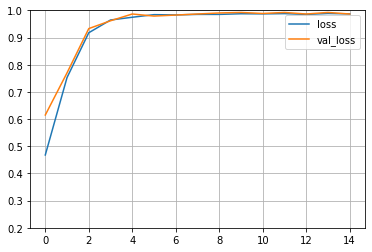

In [ ]:
def plot_loss(history):
    plt.plot(history.history['accuracy'], label='loss')
    plt.plot(history.history['val_accuracy'], label='val_loss')
    plt.ylim([0.2, 1])
    plt.legend()
    plt.grid(True)
plot_loss(history)

One hot encoding is used for the boundary plotting.


In [ ]:
class Onehot2Int(object):
    def __init__(self, model):
        self.model = model

    def predict(self, X):
        y_pred = self.model.predict(X)
        return np.argmax(y_pred, axis=1)
keras_model_no_ohe = Onehot2Int(model)

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


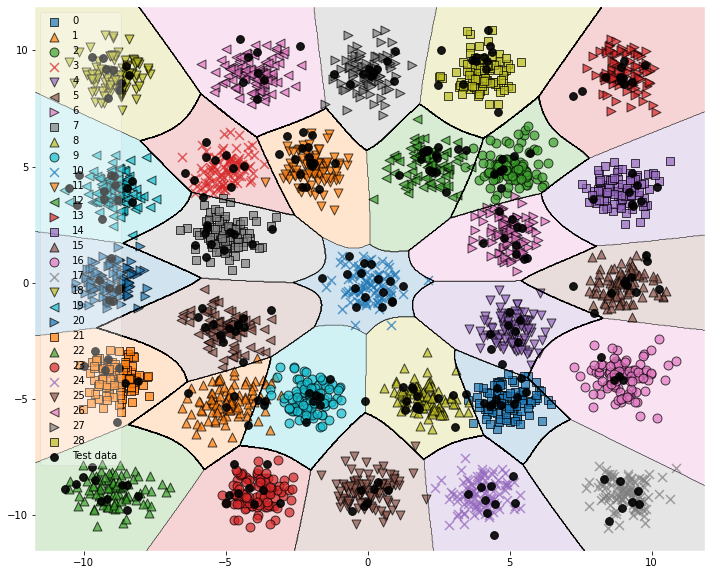

In [ ]:
# Plot decision boundary
contourf_kwargs = {'alpha': 0.2}
scatter_kwargs = {'s': 80, 'alpha': 0.7}
scatter_highlight_kwargs = {'s': 60, 'label': 'Test data', 'alpha': 0.9, 'c':'k'}
fig = plt.figure(figsize=(12,10))
plot_decision_regions(X_train, y_train, clf=keras_model_no_ohe, legend=2, contourf_kwargs = contourf_kwargs, 
                      scatter_kwargs=scatter_kwargs, X_highlight=X_test, scatter_highlight_kwargs= scatter_highlight_kwargs)
plt.show()